In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("csc475-575-Spring2022-assignment3.ipynb")

# CSC475/575 Spring 2022 - Assignment 3

This assignment covers topics related to extracting information from audio signals and more specifically tempo estimation and beat tracking. Information about the course can be found at the 
[CSC475/575 Brightspace](https://bright.uvic.ca/d2l/home/196001). 


* A3.1: Sonification of beat annotations  
* A3.2: Plotting of beat annotations over rms contour  
* A3.3: Constant-thresholding of RMS contour for beat tracking 
* A3.4: Autocorrelation of RMS contour for tempo estimation  
* A3.5: Evaluation of tempo estimation and beat tracking using mir_eval and comparison with librosa beat tracking.  

CSC575 only (instead of A3.1): 
* A3.G: Click track detection 

Each question is worth 2 points for a total of 10 points for the assignment. 


In [20]:
import numpy as np
import random
import IPython.display as ipd
import matplotlib.pyplot as plt
import math 
%matplotlib inline
import librosa
import librosa.display
#import otter
import os
import soundfile as sf
#grader = otter.Notebook()


**Question A3.1 (basic):** 
 
Check the beat annotations for the GTZAN dataset: 
https://github.com/TempoBeatDownbeat/gtzan_tempo_beat

Write code that sonifies the beat annotations. The first column contains the times of each beat in second and the second column in the .beats files corresponds to the metric position (the downberat is 1). Sonify the beat annotations using the kick drum sound for the first beat, one hi-hat sound for each beat/quarter note, and a snare sound on beats 2 and 4. Mix the resulting sonified beat track with the corresponding audio file from the GTZAN dataset. The audio files can be found at: 
https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification

Listen to the results for the following files: 
1. disco.00000.wav 
2. metal.00000.wav
3. country.00000.wav 

 (**Basic: 2 points**)


In [7]:
def getfile1():
    path ="./gtzan_tempo_beat-main/beats/"
    dirs = os.listdir( path )
    li=[]
    filename=[]
    for file in dirs:
        if os.path.splitext(file)[1] == '.beats':
            li.append(file)
    return li

In [8]:
file=getfile1()

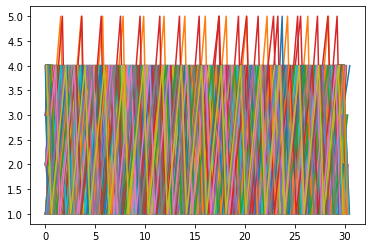

In [15]:
for i in file:
    filename="./gtzan_tempo_beat-main/beats/"+i
    f=open(filename,'r')
    data=f.readlines()
    x=[]
    y=[]
    for j in data:
        value=j.strip().split('\t')
        if len(value)>1:
            x.append(float(value[0]))
            y.append(float(value[1]))
    plt.plot(x,y)
plt.show()

**Question A3.2 (basic):** 

Use a window size of 2048 samples and no overlap (hopsize of 2048) to compute the RMS contour of an audio track from the GTZAN collection. For each window of 2048 samples there will be one value of RMS. Plot the resulting contour using either the matplotlib library or the Bokeh plotting library and place lines at every beat location based on the beat annotations. The downbeat (beat 1) should be thicker and colored red with the remaining beats (typically 2,3,4 although sometimes just 2,3 if the time signature is 3/4) colored black. Show the resulting plots for the same examples as the previous question. 

1. disco.00000.wav 
2. metal.00000.wav
3. country.00000.wav 


(**Basic: 2 points**)


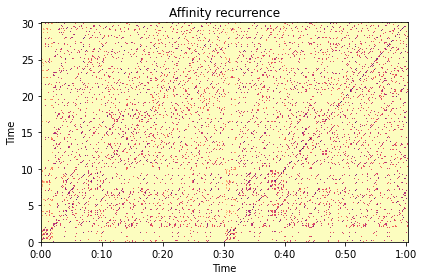

In [21]:
audio,srate = librosa.load("disco.00000.wav")
audio2 = np.hstack([audio,audio])
hop_length = 1024
y_ref, sr = librosa.load("disco.00000.wav")
sf.write("audio2.wav",audio2,srate)
y_comp, sr = librosa.load("audio2.wav")
mfcc_ref = librosa.feature.mfcc(y=y_ref, sr=sr, hop_length=hop_length)
mfcc_comp = librosa.feature.mfcc(y=y_comp, sr=sr, hop_length=hop_length)
xsim_aff = librosa.segment.cross_similarity(mfcc_comp, mfcc_ref,mode = "affinity")

plt.figure()
librosa.display.specshow(xsim_aff, x_axis='time', y_axis='time',cmap='magma_r', hop_length=hop_length)
plt.title('Affinity recurrence')
plt.tight_layout()

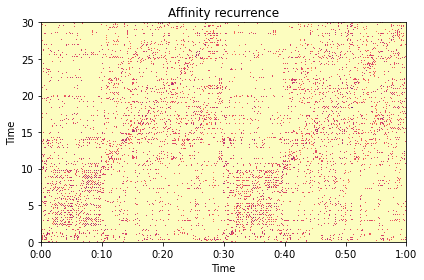

In [26]:
audio,srate = librosa.load("metal.00000.wav")
audio2 = np.hstack([audio,audio])
hop_length = 1024
y_ref, sr = librosa.load("metal.00000.wav")
sf.write("audio2.wav",audio2,srate)
y_comp, sr = librosa.load("audio2.wav")
mfcc_ref = librosa.feature.mfcc(y=y_ref, sr=sr, hop_length=hop_length)
mfcc_comp = librosa.feature.mfcc(y=y_comp, sr=sr, hop_length=hop_length)
xsim_aff = librosa.segment.cross_similarity(mfcc_comp, mfcc_ref,mode = "affinity")

plt.figure()
librosa.display.specshow(xsim_aff, x_axis='time', y_axis='time',cmap='magma_r', hop_length=hop_length)
plt.title('Affinity recurrence')
plt.tight_layout()

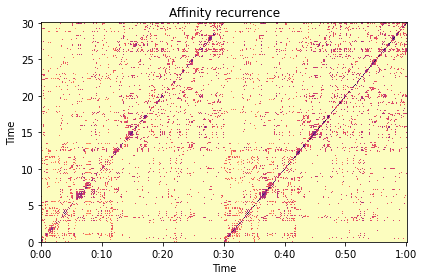

In [27]:
audio,srate = librosa.load("country.00000.wav")
audio2 = np.hstack([audio,audio])
hop_length = 1024
y_ref, sr = librosa.load("country.00000.wav")
sf.write("audio2.wav",audio2,srate)
y_comp, sr = librosa.load("audio2.wav")
mfcc_ref = librosa.feature.mfcc(y=y_ref, sr=sr, hop_length=hop_length)
mfcc_comp = librosa.feature.mfcc(y=y_comp, sr=sr, hop_length=hop_length)
xsim_aff = librosa.segment.cross_similarity(mfcc_comp, mfcc_ref,mode = "affinity")

plt.figure()
librosa.display.specshow(xsim_aff, x_axis='time', y_axis='time',cmap='magma_r', hop_length=hop_length)
plt.title('Affinity recurrence')
plt.tight_layout()

**Question A3.3 (expected):** 

After visual inspection of the RMS plots from the previous question come up with a threshold-based method for beat detection. You can either use an absolute threshold (a constant value for the y-axis) or an adaptive threshold expressed as a percentage of the maximum RMS across the recording. Any locations where the RMS values are above the threshold will be marked as beats. 

Add the detected beats using your threshold method to the plots of the three audio tracks from the previous question. This can be considered a simple basic beat tracking method. 

**(2 points)** 


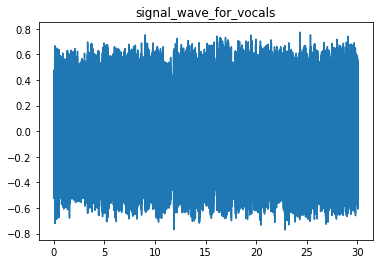

In [28]:
#Q2_1
#I have used command prompt to separate 4 stems, spleeter separate -i rock.wav -p spleeter:4stems -o output
#no code included

audio,sr = librosa.load("country.00000.wav")
vocal = librosa.stft(audio)
vocal = librosa.istft(vocal)
time = np.linspace(0,len(vocal)/srate,num = len(vocal))
plt.figure(1)
plt.title("signal_wave_for_vocals")
plt.plot(time,vocal)
ipd.Audio(audio,rate = sr)

<!-- BEGIN QUESTION -->

**Question A3.4 (expected):** 

Perform autocorrelation of the RMS contour and observe the peaks of the result. One of these peaks should correspond to the tempo (i.e the location of the peak on the x-axis of the autocorrelation). Notice that the autocorrelation will be in units of frames/windows (each of which is 2048 samples), that can be translated to samples or time in seconds and then compared to BPM. The main challenge in this question is to do the right conversions and select the appropriate peak that corresponds to the tempo. Experiment a bit with the plots for the 3 audio tracks we have been looking (feel free to also try some other ones) to come up with a method of tempo estimation that return a single BPM estimate for the track. Show the resulting BPM estimates for the 3 tracks 
as well as the corresponding ground truth from the tempo annotations. You should be able to get at least some tempos "correct" considering also half/double the ground truth as "correct". 


In [31]:
#Q2_3
def sonify(amp_track, pitch_track, srate, hop_size):

    times = np.arange(0.0, float(hop_size * len(pitch_track)) / srate,
                      float(hop_size) / srate)

    # sample locations in time (seconds)                                                      
    sample_times = np.linspace(0, np.max(times), int(np.max(times)*srate-1))

    # create linear interpolators for frequencies and amplitudes                              
    # so that we have a frequency and amplitude value for 
    # every sample 
    freq_interpolator = interp1d(times,pitch_track)
    amp_interpolator = interp1d(times,amp_track)

    # use the interpolators to calculate per sample frequency and                             
    # ampitude values                                                                         
    sample_freqs = freq_interpolator(sample_times)
    sample_amps  = amp_interpolator(sample_times)

    # create audio signal                                                                     
    audio = np.zeros(len(sample_times));
    T = 1.0 / srate
    phase = 0.0
    
    # update phase according to the sample frequencies 
    for i in range(1, len(audio)):
        audio[i] = sample_amps[i] * np.sin(phase)
        phase = phase + (2*np.pi*T*sample_freqs[i])

    return audio

def pitch_fft(frame, srate): 
    mag = np.abs(np.fft.fft(frame))
    mag = mag[0:int(len(mag)/2)]
    pitch_estimate = np.argmax(mag) * (srate / len(frame))
    return pitch_estimate
def pitch_track(signal, hopSize, winSize, extractor): 
    offsets = np.arange(0, len(signal), hopSize)
    pitch_track = np.zeros(len(offsets))
    amp_track = np.zeros(len(offsets))
    
    for (m,o) in enumerate(offsets): 
        frame = signal[o:o+winSize] 
        pitch_track[m] = extractor(frame, srate)
        amp_track[m] = np.sqrt(np.mean(np.square(frame)))  

        if (pitch_track[m] > 1500): 
            pitch_track[m] = 0 
        
    return (amp_track, pitch_track)

from scipy.interpolate import interp1d 
drum,srate = librosa.load("disco.00000.wav")
vocal,srate= librosa.load('disco.00000.wav')
at1, pt1= pitch_track(vocal,256,512,pitch_fft)
pt1_audio = sonify(at1, pt1, srate, 256)
mix1 = np.vstack([drum[0:len(pt1_audio)],pt1_audio])
ipd.Audio(mix1,rate = srate)



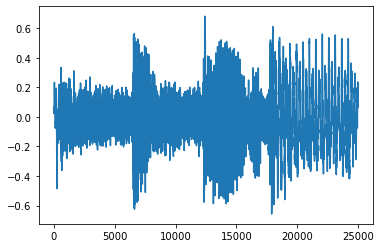

In [32]:
plt.plot(drum[125000:150000])

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question A3.5 (advanced):** 

In this question you will explore how to set up a more structured larger scale evaluation to compare your simple beat tracker developed for question A3.3 and tempo estimator developed for question A3.4 with the beat tracker/tempo estimation provided in the librosa Python library. First check that you can run and 
visualize/hear/see the results of beat tracking and tempo estimation using the librosa algorithm described in: 
https://librosa.org/doc/main/generated/librosa.beat.beat_track.html

Then setup an evaluation of the entire GTZAN dataset. This will require downloading approximately 1.4GB of audio data. For tempo estimation you will write the evaluation code calculating two metrics. For accuracy_1 an estimated tempo will be considered correct if it is within +/- 2BPM of the ground truth tempo and for accuracy_2 an estimated will be considered correct if it is within +/- 2BPM of the ground truth tempo or the estimated tempo * 2 or estimated tempo * 0.5 is within +/- 2BPM of the ground truth tempo. 

Calculate the average accuracy1 and accuracy2 across the entire GTZAN dataset for "your" algorithm developed in question A3.4 as well as the librosa beat tracker. 

For the evaluation of beat tracking you will use the excellent mir_eval library: 
https://craffel.github.io/mir_eval/#module-mir_eval.beat

Calculate the average F1-score as well as the average Goto metric over the entire GTZAN datasets for your beat tracking algorithm developed in question A3.3 as well as the librosa beat tracker. 



**(2 points)**


Text(0.5, 1.0, 'Figure for snare drum')

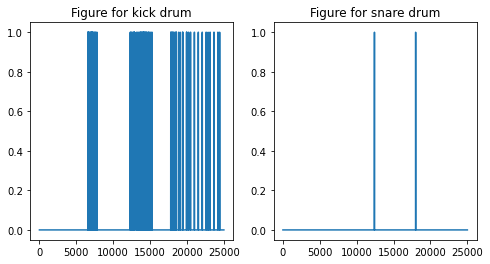

In [34]:
def drum_detection(audio):
    snare = []
    kick = []
    for i in range(len(audio)):
        if audio[i] > 0.6:
            snare.append(i)
        elif audio[i] > 0.35:
            kick.append(i)
    return kick, snare

kick,snare = drum_detection(drum)

k = np.zeros(len(drum))
for i in kick:
    k[i] = 1
s = np.zeros(len(drum))
for i in snare:
    s[i] = 1

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(k[125000:150000])
plt.title('Figure for kick drum')
plt.subplot(1, 2, 2)
plt.plot(s[125000:150000])
plt.title('Figure for snare drum')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### **Question A3.G (CSC575/advanced):** 

This question only needs to be answered by graduate students who are registered in CSC575 and for these students it will be graded instead of question A2.1 which is optional for them. 

Your goal in this question is to develop a measure of how likely it is that a particular audio track was recorded using a click track (i.e the musicians playing were listening to a steady metronome while playing or the track was created using loops with a fixed tempo). Your method should be based on the ground truth beat annotations for the GTZAN dataset. You can read this old blog post by Paul Lamere about how to go about it. 

https://musicmachinery.com/2009/03/02/in-search-of-the-click-track/


Generate similar plots to the blog post for the three audio tracks we have focused on in the earlier parts of the assignment.Now think of a way to summarize how steady the beats are for a particular recording. Using your metric "score" all the tracks in the GTZAN dataset and identify the top 3 most likely track to be recorded with a click track and the 3 most unlikely tracks to be recorded with a click track. 

Repeat the process for the beats estimated by the librosa beat tracker. Do an informal comparison between the results from the ground truth beats and the results from the estimated beats. 


<!-- END QUESTION -->



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export()